In [1]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('../style/sci.mplstyle')

In [2]:
#parameters
c      = 299792458 #velocity of light (m/s)
hbar   = 6.582119569e-16 #reduced Planck constant (eV.s)
eps0   = 8.854187817e-12 #vacuum permittivity (F/m)

In [3]:
ener, repsx, repsy, repsz = np.loadtxt('epsr_AuDots.dat', unpack=True)
ener, iepsx, iepsy, iepsz = np.loadtxt('epsi_AuDots.dat', unpack=True)

#count the average of real and im part components 
eps1 = (repsx+repsy+repsz)/3
eps2 = (iepsx+iepsy+iepsz)/3

In [4]:
#define function of n, kappa, abs.coeff., & sigma real
def refractive_index(eps1, eps2):
    n = ((eps1 + (eps1**2 + eps2**2) **(0.5)) **(0.5)) / np.sqrt(0.5)
    return n

def extinction_coeff(eps1, eps2):
    kappa = ((-eps1 + (eps1**2 + eps2**2) **(0.5)) **(0.5)) / np.sqrt(0.5)
    return kappa

def absorption_coeff(ener, kappa, c, hbar):
    alpha = (2 * kappa * ener) / (hbar * c)
    return alpha

def sigma_real(eps2, ener, hbar):
    sigma = (eps2 * ener) / hbar
    return sigma

In [5]:
#calculate the array above
n     = refractive_index(eps1, eps2)
kappa = extinction_coeff(eps1, eps2)
alpha = absorption_coeff(ener, kappa, c, hbar)
sigma = sigma_real(eps2, ener, hbar)

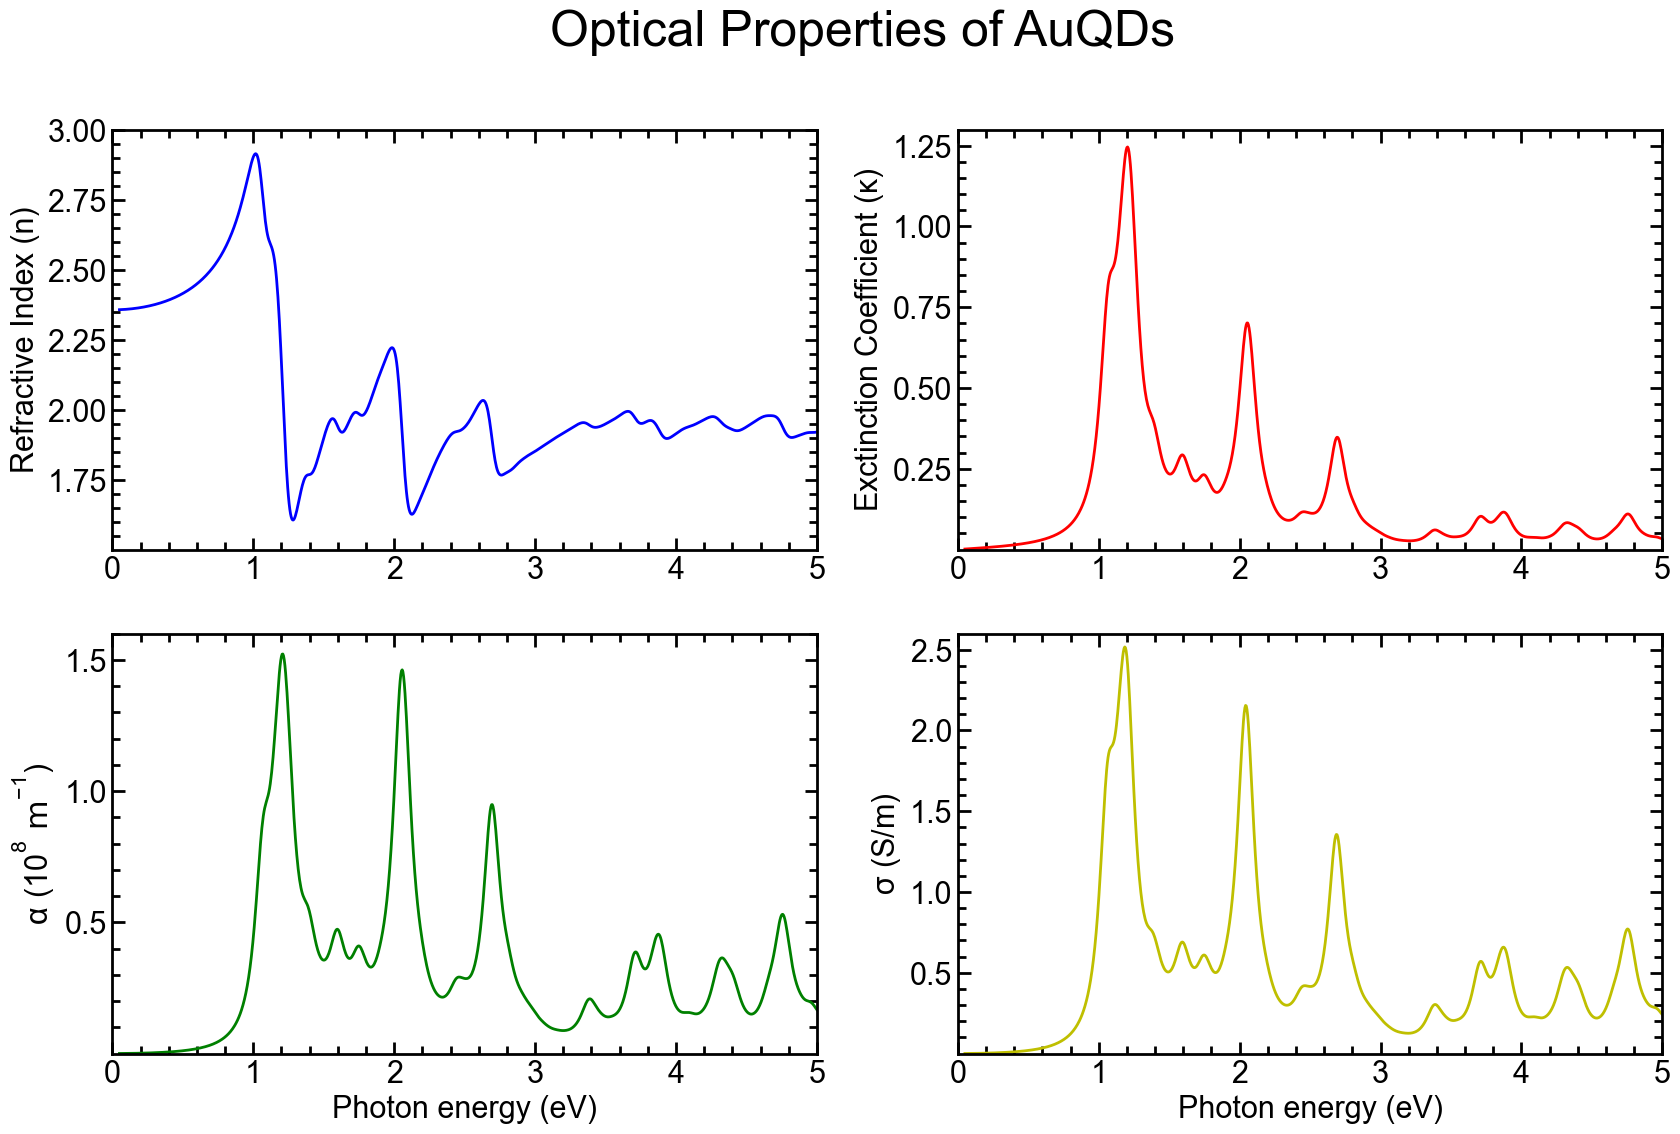

In [11]:
#create figure object
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))

#plot the optical properties
ax[0, 0].plot(ener, n, 'b-')
ax[0, 1].plot(ener, kappa, 'r-')
ax[1, 0].plot(ener, alpha/1.e7, 'g-')
ax[1, 1].plot(ener, sigma/1.e15, 'y')

#add the x and y-axis labels
ax[1, 0].set_xlabel('Photon energy (eV)')
ax[1, 1].set_xlabel('Photon energy (eV)')
ax[0, 0].set_ylabel(r'Refractive Index (n)')
ax[0, 1].set_ylabel(r'Exctinction Coefficient ($\kappa$)')
ax[1, 0].set_ylabel(r'$\alpha\ (10^{8}\ \mathrm{m}^{-1})$')
ax[1, 1].set_ylabel(r'$\sigma$ (S/m)')

ax[0, 0].set_xlim(0, 5)
ax[0, 1].set_xlim(0, 5)
ax[1, 0].set_xlim(0, 5)
ax[1, 1].set_xlim(0, 5)
ax[0, 0].set_ylim(1.5, 3)
ax[0, 0].set_yticks([1.75, 2, 2.25, 2.5, 2.75, 3])
ax[1, 0].set_ylim(0, 1.6)
ax[1, 0].set_yticks([0.5, 1, 1.5])
ax[0, 1].set_ylim(0, 1.3)
ax[0, 1].set_yticks([0.25, 0.5, 0.75, 1, 1.25])
ax[1, 1].set_ylim(0, 2.6)
ax[1, 1].set_yticks([0.5, 1, 1.5, 2, 2.5])
fig.suptitle('Optical Properties of AuQDs', fontsize=36)

#save figure
fig.savefig('./Optical Properties AuQDs.png', dpi=600)
plt.show()